In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime 
import seaborn as sns
from matplotlib import pyplot as plt

from utils.jtwc_cyclone_utils import get_southern_hem_data, get_NWP_data
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [3]:
future_cyclone_df = pd.read_csv('../cyclone_data/resampled/future_cyclone_intensity.csv')
future_cyclone_df

,timestamp,latitude_degrees,longitude_degrees,basin,tropical_sst_126,local_sst_126,relative_sst_126,tropical_sst_245,local_sst_245,relative_sst_245,...,local_sst_scaled_370,tropical_sst_scaled_585,local_sst_scaled_585,basin_numerical,future,peak_wind_126,peak_wind_245,peak_wind_370,peak_wind_585,quantile
0,2015-02-28 00:00:00,7.3,149.8,WP,27.640710,28.875692,1.234981,27.698423,28.873789,1.175365,...,-1.485915,-0.815066,-1.495362,2,True,117.864117,125.780973,118.265681,125.739407,0.85
1,2015-06-01 00:00:00,4.4,156.1,WP,27.765518,30.120071,2.354553,27.838305,30.184315,2.346010,...,0.612467,-0.421283,0.376866,2,True,100.664417,96.514936,95.322948,99.078525,0.75
2,2015-07-08 00:00:00,7.5,145.3,WP,27.341799,30.098497,2.756699,27.401316,30.130117,2.728802,...,0.496964,-1.470389,0.347199,2,True,54.137860,54.407881,54.678182,53.979219,0.25
3,2015-07-13 00:00:00,21.5,126.5,WP,27.341799,29.402730,2.060932,27.401316,29.424799,2.023483,...,-0.834877,-1.470389,-0.912458,2,True,96.521323,95.101862,97.135307,103.169537,0.75
4,2015-07-17 00:00:00,20.1,150.8,WP,27.341799,28.793873,1.452074,27.401316,28.877990,1.476675,...,-1.450143,-1.470389,-1.643982,2,True,117.749515,122.543214,116.594719,118.382979,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2049-03-10 00:00:00,-8.7,157.2,SP,28.585459,30.772000,2.186541,28.796192,30.783005,1.986813,...,1.643522,2.345746,1.749180,1,True,48.668377,49.184206,48.733526,49.215530,0.15
1472,2049-04-10 00:00:00,-5.3,188.7,SP,28.849090,30.586481,1.737391,29.043240,30.740833,1.697594,...,1.409789,2.963455,1.275768,1,True,132.308674,136.946521,136.094566,137.805521,0.85
1473,2049-11-19 00:00:00,-11.8,171.5,SP,28.196543,29.662104,1.465561,28.308370,29.750036,1.441666,...,-0.113894,1.444019,-0.166041,1,True,113.592301,107.174022,111.242055,107.191107,0.65
1474,2049-12-09 00:00:00,-12.6,151.2,SP,28.211971,29.230350,1.018379,28.327753,29.466457,1.138704,...,-0.425632,1.514625,-0.500115,1,True,54.543397,58.913494,59.005623,57.327222,0.25


latitude: -22.6 to 28.6
longitude: 35.8 to 228.6


/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


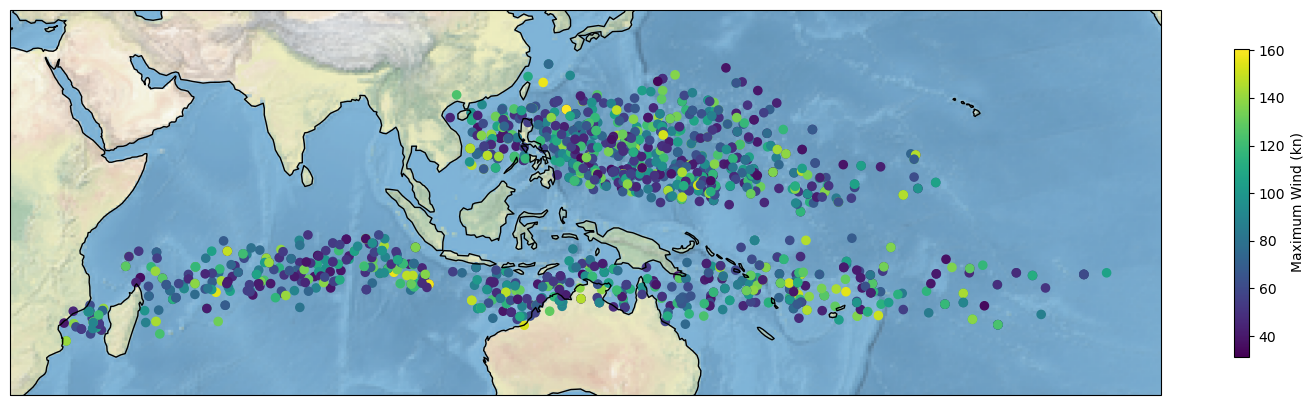

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [5]:
## only show origin sites for now
min_long = future_cyclone_df['longitude_degrees'].min()
min_lat = future_cyclone_df['latitude_degrees'].min()

max_long = future_cyclone_df['longitude_degrees'].max()
max_lat = future_cyclone_df['latitude_degrees'].max()
centre_long = (max_long-min_long)/2

print('latitude: ' + str(min_lat) + ' to ' + str(max_lat))
print('longitude: ' + str(min_long) + ' to ' + str(max_long))

height = 5
fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

scatter = plt.scatter(x=future_cyclone_df['longitude_degrees'], y=future_cyclone_df['latitude_degrees'], cmap='viridis',c=future_cyclone_df['peak_wind_370'], transform=ccrs.PlateCarree(), s=35)
cbar = fig.colorbar(scatter,shrink=0.8)

cbar.set_label('Maximum Wind (kn)')
#spatial distribution and followup work

plt.show()
fig.tight_layout()
fig.savefig('./media/Cyclone/predictions/predict_map.png')